# Prática 2

In [21]:
import csv
import numpy as np

def load_iris():
    fh = open("data/iris.data", 'r')
    csv_fh = csv.reader(fh)
    
    header = csv_fh.next()
    data = []
    for row in csv_fh:
        data.append(row)
    
    data = np.array(data)
        
    X = data[:, 0:4].astype(np.float)
    y = data[:, -1]
    
    d = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
    
    y2 = np.array( map(lambda x: d[x], y) )
    
    return(X, y2, header)

In [22]:
X, y, header = load_iris()

In [23]:
dims = [2, 3]

In [24]:
A = X[:, dims]

In [25]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0, max_depth=2)

In [26]:
clf = clf.fit(A, y)

In [27]:
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

In [28]:
A[[0, 50, 100], :]

array([[ 1.4,  0.2],
       [ 4.7,  1.4],
       [ 6. ,  2.5]])

In [29]:
y[[0, 50, 100]]

array([0, 1, 2])

In [30]:
clf.predict( A[[0, 50, 100], :] )

array([0, 1, 2])

In [31]:
clf.predict_proba( A[[0, 50, 100], :] )

array([[ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.90740741,  0.09259259],
       [ 0.        ,  0.02173913,  0.97826087]])

In [32]:
from sklearn.tree import export_graphviz

export_graphviz(clf, out_file='/tmp/tree.dot',
               feature_names=header,
               class_names=['setosa', 'versicolor', 'virginica'],
               rounded=True, filled=True)

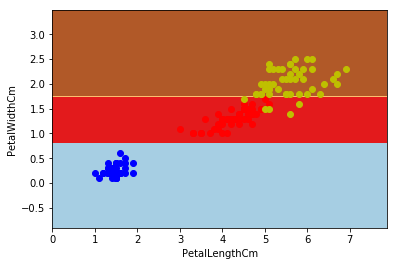

In [34]:
from plot_decision_boundary import plot_decision_boundary
import matplotlib.pyplot as plt


plot_decision_boundary(A, y, header, dims,
                       ['setosa', 'versicolor', 'virginica'], clf)

plt.show()